# Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]

print(f'User uploaded file "{file_name}" with length {len(uploaded[file_name])} bytes')

Saving cleaned_imdb.csv to cleaned_imdb.csv
User uploaded file "cleaned_imdb.csv" with length 205039 bytes


In [3]:
df = pd.read_csv(file_name)

# EDA

## Boxplot of Movie Runtime

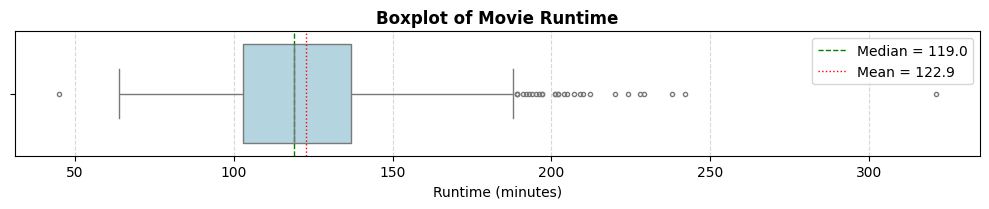

In [4]:
plt.figure(figsize=(10, 2.2))
sns.boxplot(
    x=df['Runtime'],
    color='lightblue',
    fliersize=3,
    linewidth=1
)

plt.title('Boxplot of Movie Runtime', fontsize=12, fontweight='bold')
plt.xlabel('Runtime (minutes)', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)

median = df['Runtime'].median()
mean = df['Runtime'].mean()

plt.axvline(median, color='green', linestyle='--', linewidth=1, label=f'Median = {median:.1f}')
plt.axvline(mean, color='red', linestyle=':', linewidth=1, label=f'Mean = {mean:.1f}')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## KDE Plot of Movie Runtime

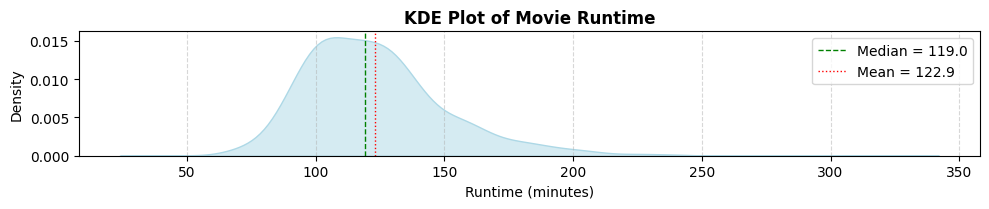

In [5]:
plt.figure(figsize=(10, 2.2))
sns.kdeplot(
    x=df['Runtime'],
    fill=True,
    alpha=0.5,
    linewidth=1,
    color='lightblue',
)

plt.title('KDE Plot of Movie Runtime', fontsize=12, fontweight='bold')
plt.xlabel('Runtime (minutes)', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.axvline(median, color='green', linestyle='--', linewidth=1, label=f'Median = {median:.1f}')
plt.axvline(mean, color='red', linestyle=':', linewidth=1, label=f'Mean = {mean:.1f}')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Correlation Heatmap of Main Numerical Variables

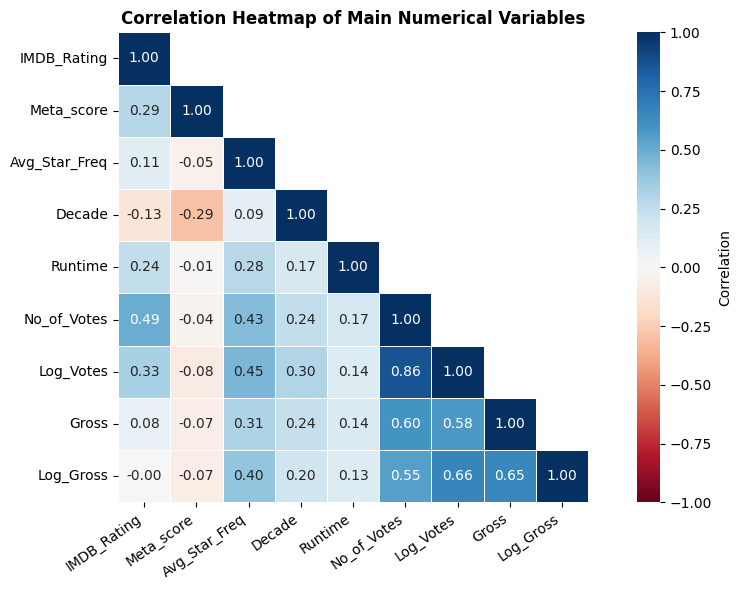

In [6]:
heatmap_cols = [
    'IMDB_Rating', 'Meta_score', 'Avg_Star_Freq', 'Decade', 'Runtime',
     'No_of_Votes', 'Log_Votes', 'Gross', 'Log_Gross'
]
corr = df[heatmap_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='RdBu',
    cbar_kws={'label': 'Correlation'},
    linewidths=0.5,
    square=True,
    vmin=-1,
    vmax=1
)
plt.title('Correlation Heatmap of Main Numerical Variables', fontsize=12, fontweight='bold')
plt.xticks(rotation=35, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

## Scatter Plot: Log_Votes vs. Log_Gross

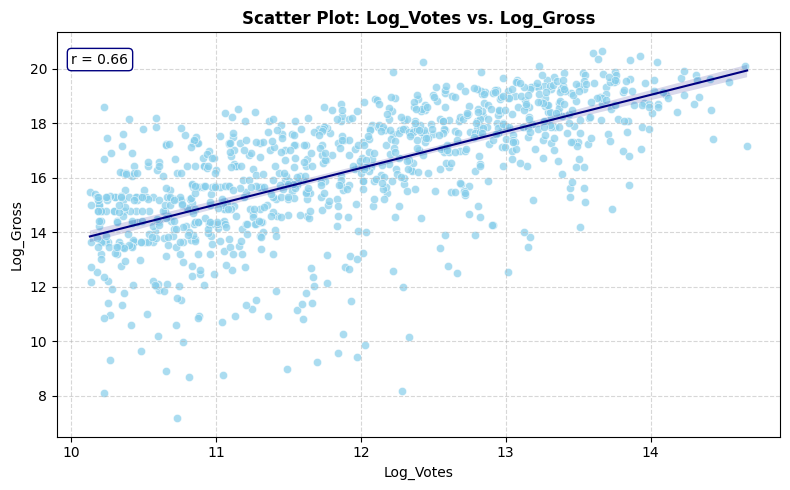

In [7]:
corr_val_log = df[['Log_Votes', 'Log_Gross']].corr().loc['Log_Votes', 'Log_Gross']

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='Log_Votes',
    y='Log_Gross',
    alpha=0.7,
    s=35,
    color='skyblue'
)

sns.regplot(
    data=df,
    x='Log_Votes',
    y='Log_Gross',
    scatter=False,
    color='navy',
    line_kws={'lw': 1.5, 'ls': '-'}
)

plt.title('Scatter Plot: Log_Votes vs. Log_Gross', fontsize=12, fontweight='bold')
plt.xlabel('Log_Votes', fontsize=10)
plt.ylabel('Log_Gross', fontsize=10)
plt.grid(linestyle='--', alpha=0.5)

plt.text(
    0.02, 0.95, f"r = {corr_val_log:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='navy', boxstyle='round,pad=0.3'),
    ha='left', va='top'
)

plt.tight_layout()
plt.show()

## Scatter Plot: No_of_Votes vs. Gross

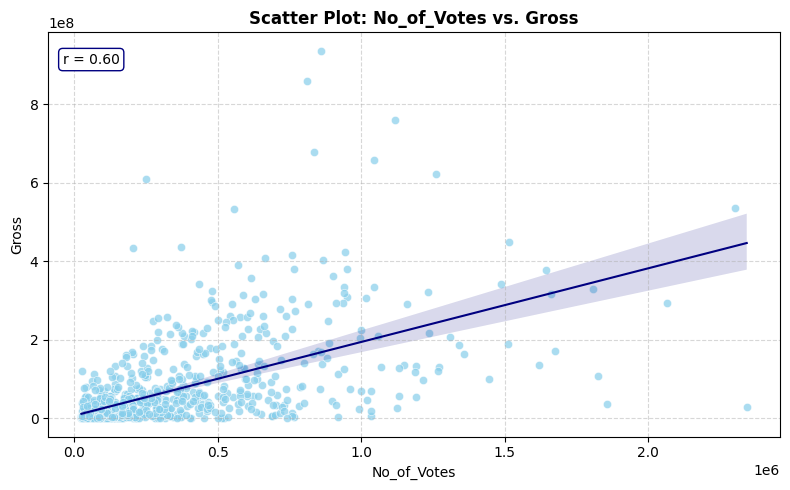

In [8]:
corr_val = df[['No_of_Votes', 'Gross']].corr().loc['No_of_Votes', 'Gross']

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='No_of_Votes',
    y='Gross',
    alpha=0.7,
    s=35,
    color='skyblue'
)

sns.regplot(
    data=df,
    x='No_of_Votes',
    y='Gross',
    scatter=False,
    color='navy',
    line_kws={'lw': 1.5, 'ls': '-'}
)

plt.title('Scatter Plot: No_of_Votes vs. Gross', fontsize=12, fontweight='bold')
plt.xlabel('No_of_Votes', fontsize=10)
plt.ylabel('Gross', fontsize=10)
plt.grid(linestyle='--', alpha=0.5)

plt.text(
    0.02, 0.95, f"r = {corr_val:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='navy', boxstyle='round,pad=0.3'),
    ha='left', va='top'
)

plt.tight_layout()
plt.show()

## Scatter Plot: IMDB_Rating vs. Meta_score

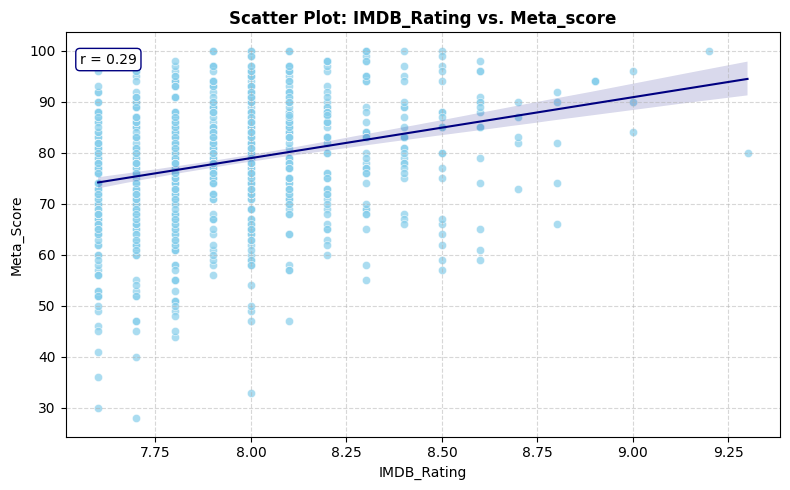

In [9]:
corr_val = df[['IMDB_Rating', 'Meta_score']].corr().loc['IMDB_Rating', 'Meta_score']

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='IMDB_Rating',
    y='Meta_score',
    alpha=0.7,
    s=35,
    color='skyblue'
)

sns.regplot(
    data=df,
    x='IMDB_Rating',
    y='Meta_score',
    scatter=False,
    color='navy',
    line_kws={'lw': 1.5, 'ls': '-'}
)

plt.title('Scatter Plot: IMDB_Rating vs. Meta_score', fontsize=12, fontweight='bold')
plt.xlabel('IMDB_Rating', fontsize=10)
plt.ylabel('Meta_Score', fontsize=10)
plt.grid(linestyle='--', alpha=0.5)

plt.text(
    0.02, 0.95, f"r = {corr_val:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='navy', boxstyle='round,pad=0.3'),
    ha='left', va='top'
)

plt.tight_layout()
plt.show()

## Top 10 Directors: Number of Movies vs. Average Number of Votes

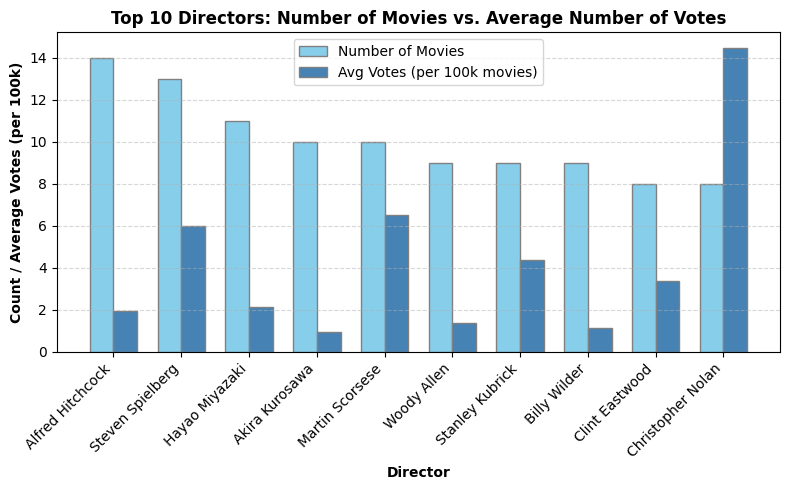

In [10]:
# Analyze the top 10 directors by number of movies
top_directors_movies = df['Director'].value_counts().head(10)

# Calculate total votes for each director
director_votes = df.groupby('Director')['No_of_Votes'].sum()

# Filter director_votes to include only the top 10 directors by movie count
top_director_votes = director_votes[top_directors_movies.index]

# Calculate votes per 100k movies for the top directors
votes_per_100k = (top_director_votes / top_directors_movies) / 100000

plot_data = pd.DataFrame({
    'Movies': top_directors_movies,
    'Votes_per_100k': votes_per_100k
})

plot_data = plot_data.sort_values('Movies', ascending=False)

plt.figure(figsize=(8, 5))

bar_width = 0.35
r1 = np.arange(len(plot_data))
r2 = [x + bar_width for x in r1]

plt.bar(r1, plot_data['Movies'], color='skyblue', width=bar_width, edgecolor='grey', label='Number of Movies')
plt.bar(r2, plot_data['Votes_per_100k'], color='steelblue', width=bar_width, edgecolor='grey', label='Avg Votes (per 100k movies)')

plt.xlabel('Director', fontsize=10, fontweight='bold')
plt.ylabel('Count / Average Votes (per 100k)', fontsize=10, fontweight='bold')
plt.title('Top 10 Directors: Number of Movies vs. Average Number of Votes', fontsize=12, fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(plot_data))], plot_data.index, rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## KDE Plot of Movie Runtime by Genre


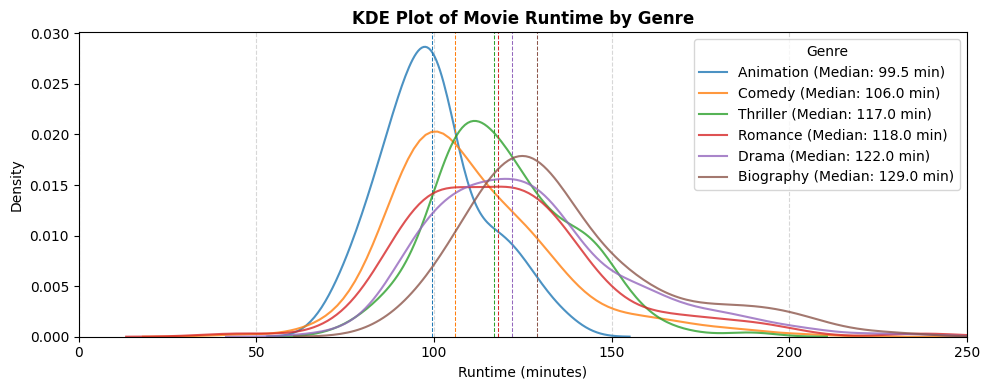

In [13]:
plt.figure(figsize=(10, 4))

genres_of_interest = ['Animation', 'Comedy', 'Thriller', 'Romance', 'Drama', 'Biography']

palette = sns.color_palette('tab10', n_colors=len(genres_of_interest))
genre_colors = dict(zip(genres_of_interest, palette))

for genre in genres_of_interest:
    genre_col_name = f'Genre_{genre}'
    if genre_col_name in df.columns:
        subset = df[df[genre_col_name] == 1]
        if len(subset) > 1:
            median_runtime = subset['Runtime'].median()
            label = f"{genre} (Median: {median_runtime:.1f} min)"
            sns.kdeplot(
                subset['Runtime'],
                label=label,
                color=genre_colors[genre],
                linewidth=1.5,
                fill=False,
                alpha=0.8,
                common_norm=False
            )
            plt.axvline(median_runtime, color=genre_colors[genre], linestyle='--', linewidth=0.75)

plt.title('KDE Plot of Movie Runtime by Genre', fontsize=12, fontweight='bold')
plt.xlabel('Runtime (minutes)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xlim(0, 250)
plt.legend(title='Genre', loc='upper right')
plt.tight_layout()
plt.show()